#ATIVIDADE - Encontro 03

**Arthur Rizzo, Felipe Goichman e Lucas Borges**

In [2]:
%matplotlib inline

import os
import pandas as pd

print("Esperamos trabalhar no diretório")
print(os.getcwd())

#os.chdir('C:/Users/Marcelo/Dropbox/DataScience/Ciência dos dados/Encontro 03/Python BL')
dados = pd.read_table('BankLoan.txt.gz', compression="gzip")

Esperamos trabalhar no diretório
C:\Users\Lucas Borges\Desktop


In [3]:
dados.EDUCACAO = dados.EDUCACAO.astype('category')
dados.EDUCACAO.cat.categories = ('Analfabeto', '1o. Grau', '2o. Grau', 'Graduacao', 'Pos-Graduacao')

dados.DEFAULT = dados.DEFAULT.astype('category')
dados.DEFAULT.cat.categories = ('Adimplente', 'Inadimplente')

Assim como já foi feito com as variáveis qualitativas nas aulas anteriores, também é possível iniciar uma análise exploratória de variáveis quantitativas por meio de construção de tabelas de frequências absolutas e relativas. 

Entretanto, aplicar o comando `value_counts` diretamente na variável quantitativa `IDADE` pode não ser muito útil dado o objetivo da análise descritiva.

Pense _o porquê_ e justifique! Rode essa linha de comando, se julgar necessário.

Porque estamos analisando os dados em faixas de idades e não apenas diversas idades separadas entre si.

Explorando a variável `IDADE` com o comando `describe`, entre outros motivos, pode ser útil para mostrar o valor mínimo e máximo dessa variável. Em seguida, o comando `cut` deixará a nova variável idade categorizada com seis níveis, sendo os quatro primeiros níveis com amplitude igual a 5 anos e dois últimos com amplitude 10.

**1) Com as linhas de comando acima, a nova variável `idade` é definida como uma variável qualitativa. Construa as tabelas de frequências (absolutas e relativas) usando os comandos de forma similar ao feito na aula passada. **

In [4]:
idade = pd.cut(dados.IDADE, (20, 25, 30, 35, 40, 50, 60), False)
idade
x=idade.value_counts()

In [5]:
divide = x.sum()
porcentagem = x*100/divide

In [6]:
data=pd.crosstab(idade, dados.DEFAULT)

In [7]:
divide = data.sum().sum()
porcentagem = data*100/divide

**1.1. Interprete os resultados observando saída das duas tabelas construídas. O que estes dados querem dizer? Onde estão mais concentrados? **

**1.2. Dos 500 clientes que fazem parte da amostra, quantos são inadimplentes e tem entre 30 anos (inclusive) e 40 anos (exclusive)? **

**1.3. Qual o percentual de clientes inadimplentes e entre [40,60) anos? **

**1.4. Entre os inadimplentes, qual o percentual de clientes entre [20,25) anos? **

**1.5. Entre clientes com 20 a 25 anos, qual o percentual de inadimplentes? E de adimplentes? **

**1.6. A distribuição das frequências relativas da variável `idade` se altera segundo a variável `DEFAULT`? Justifique de forma clara sua resposta. Qual a importância dessa pergunta para o principal objetivo do problema? Justifique.**

**RESPOSTAS**

1.1) Os dados da primeira tabela são o numero de casos presentes entre os determinados intervalos de idade(esta mais concentrado entre 40 e 50 anos) e a segunda tabela equivale a porcentagem de cada intervalo de idade, isto é, o numero de ocorrencias de casos pelo numero total de pessoas(esta mais concentrado entre 40 e 50 anos).

1.2) 44 clientes são inadimplentes e estão na faixa entre 30 e 40 anos.

1.3) O percentual de clientes inadimplentes entre 40 e 60 anos é de 6.2%.

1.4) Seria o total de inadimplentes pelo numero de inadimplentes entre 20 e 25 anos, ou seja, seria 35/129, algo como 27,13%.

1.5) O percentual de adimplentes seria o numero total de clientes entre 20 e 25 anos pelo numero de adimplentes dessa faixa de idade,ou seja, 26/45, algo como 57,7%. Já o percentual de inadimplentes equivale a 19/45, algo como, 42,2%.

1.6) A distribuição das frequencias relativas da variavel idade se altera segundo a variavel DEFAULT, uma vez que cruzamos os dados entre eles, dando um porcentual diferente.

Com as linhas de comando a seguir, obtêm-se os gráficos apresentados abaixo:

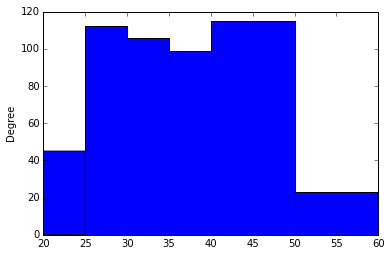

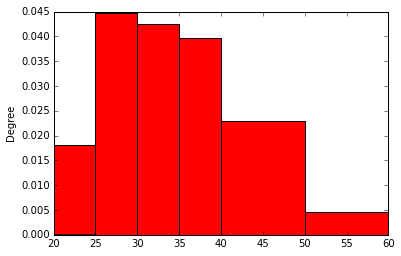

In [8]:
pd.DataFrame.plot(kind='hist', data=dados.IDADE, bins=(20, 25, 30, 35, 40, 50, 60), color=('blue'), legend=False)
pd.DataFrame.plot(kind='hist', data=dados.IDADE, bins=(20, 25, 30, 35, 40, 50, 60), color=('red'), normed=True, legend=False)

**2) Responda:**

**2.1. Esses gráficos são iguais? Ou seja, obtemos a mesma interpretação sobre o comportamento da variável `IDADE` quando se interpretam ambos? Justifique sua resposta. **

**2.2. Qual a consequência da utilização da densidade para o histograma? A partir da **Tabela 1**, como deve ser feita a conta para obter o valor da densidade em cada faixa de idade?**

Faixa de idade|Frequência absoluta|Frequência relativa|Densidade
-|-|-|-
[20,25)|45|0,090|
[25,30)|112|0,224|
[30,35)|106|0,212|
[35,40)|99|0,198|
[40,50)|115|0,230|
[50,60)|23|0,046|
Total|500|1|

<center>Tabela 1. Frequências absolutas e relativas da variável `IDADE`.</center>

**2.3. Se os histogramas são construídos com faixas de idade todas de mesma amplitude (por exemplo, 5 anos), o que acontece com visual dos histogramas construídos quando utilizada a frequência absoluta e densidade?**

**2.4. Construa um histograma para variável `IDADE` para cada categoria da variável `DEFAULT`. Interprete-os.**

**RESPOSTAS**

2.1)Os graficos não são iguais, uma vez que um corresponde a frequencia absoluta(numero de casos) e o outro a frequencia
relativa(porcentagem), cuja  diferença está na densidade que foi implantada no segundo grafico, que reflete na diferença 
das colunas.

2.2) A utilização da densidade faz com que as colunas com intervalos maiores diminuam de tamanho, uma vez que equivaleria a uma relação entre o intervalo de idade e o numero de casos. Para obter o valor da densidade, devemos pegar a frequencia absoluta e dividi-lo pelo numero de intervalo de idade.

2.3) Os graficos de frequencia absoluta e da frequencia relativa ficariam iguais, só mudando apenas o eixo y dos graficos, isso porque os intervalos de idade seriam os mesmos.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000082019E8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000084AA2B0>], dtype=object)

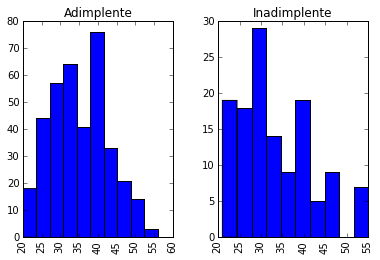

In [9]:
#2.4)
dados.IDADE.hist(dados.DEFAULT)

Além de apresentar as frequências absoluta e relativa para cada faixa de idade, a **Tabela 2** também apresenta a frequência relativa acumulada. Uma possível interpretação que utiliza essa frequência acumulada, útil em variáveis quantitativas, seria dizer que a maioria dos clientes (52,6% ) da amostra tem menos de 35 anos.

Faixa de idade|Frequência absoluta|Frequência relativa (%)|Frequência relativa acumulada (%)
-|-|-|-
[20,25)|45|9,0%|9,0% 
[25,30)|112|22,4%|31,4% 
[30,35)|106|21,2%|52,6% 
[35,40)|99|19,8%|72,4% 
[40,50)|115|23,0%|95,4% 
[50,60)|23|4,6%|100,0% 
Total|500|100%| 

<center>**Tabela 2.** Frequências absolutas, relativas e relativas acumuladas da variável `IDADE`.</center>

**3) Considerando os resultados da Tabela 2 e o histogram de densidade, faça contas para determinar: **

**3.1. Valor que divide os 50% mais jovens dos demais 50% (menos jovens). **

**3.2. Menor idade entre os 25% clientes mais velhos. E a maior idade entre os 75% clientes mais jovens. **

**3.3. Percentual de clientes com até 45 anos? **

**3.4. Percentual de clientes acima de 37 anos?**

In [10]:
idade = pd.cut(dados.IDADE, (0,37,45,60), False)
idade
x=idade.value_counts()
divide = x.sum()
porcentagem1 = x*100/divide
porcentagem1

[0, 37)     59.8
[37, 45)    27.2
[45, 60)    13.0
dtype: float64

**RESPOSTAS**

In [11]:
dados.IDADE.median()

34.0

3.1) O valor mediano é 34 anos.

3.2) A menor idade entre os 25% mais velhos é de 40 anos. A maior idade entre os 75% mais jovens é  de 29 anos.

3.3) O percentual é de 87%.

3.4) O percentual é de 40,2%.